## WEEK 1

### Loading Graphs in NetworkX

<IPython.core.display.Javascript object>


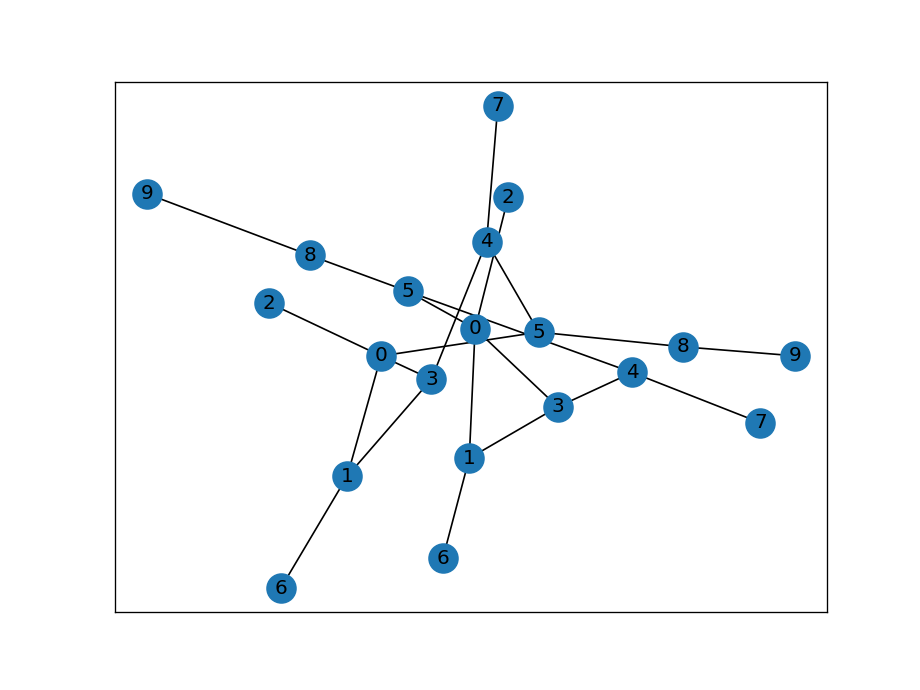

In [1]:
import networkx as nx
import numpy as np
import pandas as pd
%matplotlib notebook

G1 = nx.Graph()
G1.add_edges_from([(0, 1),
                   (0, 2),
                   (0, 3),
                   (0, 5),
                   (1, 3),
                   (1, 6),
                   (3, 4),
                   (4, 5),
                   (4, 7),
                   (5, 8),
                   (8, 9)])

#draw the network
nx.draw_networkx(G1)

### Adjacency List

`G_adjlist.txt` is the adjaceny list representation of G1.

It can be read as follows:
* `0 1 2 3 5` $\rightarrow$ node `0` is adjacent to nodes `1, 2, 3, 5`
* `1 3 6` $\rightarrow$ node `1` is (also) adjacent to nodes `3, 6`
* `2` $\rightarrow$ node `2` is (also) adjacent to no new nodes
* `3 4` $\rightarrow$ node `3` is (also) adjacent to node `4` 

and so on. Note that adjacencies are only accounted for once (e.g. node `2` is adjacent to node `0`, but node `0` is not listed in node `2`'s row, because that edge has already been accounted for in node `0`'s row).

In [2]:
!cat G_adjlist.txt

0 1 2 3 5
1 3 6
2
3 4
4 5 7
5 8
6
7
8 9
9


In [3]:
G2 = nx.read_adjlist('G_adjlist.txt', nodetype=int)
G2.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (0, 5), (1, 3), (1, 6), (3, 4), (5, 4), (5, 8), (4, 7), (8, 9)])

### Adjacency Matrix

The elements in an adjacency matrix indicate whether pairs of vertices are adjacent or not in the graph. Each node has a corresponding row and column. For example, row `0`, column `1` corresponds to the edge between node `0` and node `1`.  

Reading across row `0`, there is a '`1`' in columns `1`, `2`, `3`, and `5`, which indicates that node `0` is adjacent to nodes 1, 2, 3, and 5

In [ ]:
G_mat = np.array([[0, 1, 1, 1, 0, 1, 0, 0, 0, 0],
                  [1, 0, 0, 1, 0, 0, 1, 0, 0, 0],
                  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [1, 1, 0, 0, 1, 0, 0, 0, 0, 0],
                  [0, 0, 0, 1, 0, 1, 0, 1, 0, 0],
                  [1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
                  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
                  [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]])
G_mat

In [5]:
G3 = nx.Graph(G_mat)
G3.edges

EdgeView([(0, 1), (0, 2), (0, 3), (0, 5), (1, 3), (1, 6), (3, 4), (4, 5), (4, 7), (5, 8), (8, 9)])

In [6]:
G3.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (0, 5), (1, 3), (1, 6), (3, 4), (4, 5), (4, 7), (5, 8), (8, 9)])

### Edgelist

The edge list format represents edge pairings in the first two columns. Additional edge attributes can be added in subsequent columns. Looking at `G_edgelist.txt` this is the same as the original graph `G1`, but now each edge has a weight. 

For example, from the first row, we can see the edge between nodes `0` and `1`, has a weight of `4`.

In [7]:
!cat G_edgelist.txt

0 1 4
0 2 3
0 3 2
0 5 6
1 3 2
1 6 5
3 4 3
4 5 1
4 7 2
5 8 6
8 9 1


#### Using `read_edgelist` and passing in a list of tuples with the name and type of each edge attribute will create a graph with our desired edge attributes.

In [8]:
G4 = nx.read_edgelist('G_edgelist.txt', data=[('weight', int)])
G4.edges(data=True)

EdgeDataView([('0', '1', {'weight': 4}), ('0', '2', {'weight': 3}), ('0', '3', {'weight': 2}), ('0', '5', {'weight': 6}), ('1', '3', {'weight': 2}), ('1', '6', {'weight': 5}), ('3', '4', {'weight': 3}), ('5', '4', {'weight': 1}), ('5', '8', {'weight': 6}), ('4', '7', {'weight': 2}), ('8', '9', {'weight': 1})])

### Pandas DataFrame

#### Graphs can also be created from pandas dataframes if they are in edge list format.

In [10]:
G_df = pd.read_csv('G_edgelist.txt', delim_whitespace=True, header=None, names=['u', 'v', 'weight'])
G_df

u  v  weight
0   0  1       4
1   0  2       3
2   0  3       2
3   0  5       6
4   1  3       2
5   1  6       5
6   3  4       3
7   4  5       1
8   4  7       2
9   5  8       6
10  8  9       1

In [14]:
G5 = nx.from_pandas_edgelist(G_df, 'u', 'v', edge_attr='weight')
G5.edges(data=True)

EdgeDataView([(0, 1, {'weight': 4}), (0, 2, {'weight': 3}), (0, 3, {'weight': 2}), (0, 5, {'weight': 6}), (1, 3, {'weight': 2}), (1, 6, {'weight': 5}), (3, 4, {'weight': 3}), (5, 4, {'weight': 1}), (5, 8, {'weight': 6}), (4, 7, {'weight': 2}), (8, 9, {'weight': 1})])

### Chess Example

Now let's load in a more complex graph and perform some basic analysis on it.

We will be looking at chess_graph.txt, which is a directed graph of chess games in edge list format.

In [15]:
!head -10 chess_graph.txt

1 2 0	885635999.999997
1 3 0	885635999.999997
1 4 0	885635999.999997
1 5 1	885635999.999997
1 6 0	885635999.999997
7 8 0	885635999.999997
7 9 1	885635999.999997
7 10 1	885635999.999997
11 12 -1	885635999.999997
13 14 1	885635999.999997


Each node is a chess player, and each edge represents a game. The first column with an outgoing edge corresponds to the white player, the second column with an incoming edge corresponds to the black player.

The third column, the weight of the edge, corresponds to the outcome of the game. A weight of 1 indicates white won, a 0 indicates a draw, and a -1 indicates black won.

The fourth column corresponds to approximate timestamps of when the game was played.

We can read in the chess graph using read_edgelist, and tell it to create the graph using a nx.MultiDiGraph.

In [16]:
chess = nx.read_edgelist('chess_graph.txt', data=[('outcome', int), ('timestamp', float)], create_using=nx.MultiDiGraph())

In [17]:
chess.is_directed(), chess.is_multigraph()

(True, True)

In [18]:
chess.edges(data=True)

OutMultiEdgeDataView([('1', '2', {'outcome': 0, 'timestamp': 885635999.999997}), ('1', '3', {'outcome': 0, 'timestamp': 885635999.999997}), ('1', '4', {'outcome': 0, 'timestamp': 885635999.999997}), ('1', '5', {'outcome': 1, 'timestamp': 885635999.999997}), ('1', '6', {'outcome': 0, 'timestamp': 885635999.999997}), ('1', '807', {'outcome': 0, 'timestamp': 896148000.000003}), ('1', '454', {'outcome': 0, 'timestamp': 896148000.000003}), ('1', '827', {'outcome': 0, 'timestamp': 901403999.999997}), ('1', '1240', {'outcome': 0, 'timestamp': 906660000.0}), ('1', '680', {'outcome': 0, 'timestamp': 906660000.0}), ('1', '166', {'outcome': -1, 'timestamp': 906660000.0}), ('1', '1241', {'outcome': 0, 'timestamp': 906660000.0}), ('1', '1242', {'outcome': 0, 'timestamp': 906660000.0}), ('1', '808', {'outcome': 0, 'timestamp': 925055999.999997}), ('1', '819', {'outcome': 0, 'timestamp': 925055999.999997}), ('1', '448', {'outcome': 0, 'timestamp': 927684000.000003}), ('1', '1214', {'outcome': 0, 'tim

In [28]:
games_played = dict(chess.degree()) #number of games played by each person
games_played

{'1': 48,
 '2': 112,
 '3': 85,
 '4': 12,
 '5': 18,
 '6': 95,
 '7': 9,
 '8': 20,
 '9': 142,
 '10': 4,
 '11': 2,
 '12': 70,
 '13': 148,
 '14': 153,
 '15': 23,
 '16': 3,
 '17': 115,
 '18': 45,
 '19': 27,
 '20': 12,
 '21': 65,
 '22': 6,
 '23': 41,
 '24': 72,
 '25': 72,
 '26': 2,
 '27': 3,
 '28': 41,
 '29': 8,
 '30': 115,
 '31': 23,
 '32': 146,
 '33': 67,
 '34': 52,
 '35': 22,
 '36': 118,
 '37': 30,
 '38': 39,
 '39': 79,
 '40': 26,
 '41': 71,
 '42': 200,
 '43': 10,
 '44': 77,
 '45': 74,
 '46': 41,
 '47': 92,
 '48': 45,
 '49': 58,
 '50': 9,
 '51': 90,
 '52': 4,
 '53': 167,
 '54': 80,
 '55': 35,
 '56': 87,
 '57': 48,
 '58': 29,
 '59': 111,
 '60': 43,
 '61': 107,
 '62': 74,
 '63': 7,
 '64': 171,
 '65': 43,
 '66': 203,
 '67': 39,
 '68': 23,
 '69': 4,
 '70': 15,
 '71': 55,
 '72': 10,
 '73': 19,
 '74': 144,
 '75': 22,
 '76': 20,
 '77': 71,
 '78': 18,
 '79': 122,
 '80': 4,
 '81': 29,
 '82': 29,
 '83': 58,
 '84': 32,
 '85': 35,
 '86': 13,
 '87': 52,
 '88': 61,
 '89': 123,
 '90': 58,
 '91': 100,
 '9

Using list comprehension, we can find which player played the most games.

In [34]:
max_games = max(games_played.values())
max_player = [i for i in games_played.keys() if games_played[i] == max_games]

print('player {}\n{} games'.format(max_player[0], max_games))

player 461
280 games


Let's use pandas to find out which players won the most games. First let's convert our graph to a DataFrame.

In [35]:
df = pd.DataFrame(chess.edges(data=True), columns=['white', 'black', 'outcome'])
df.head()

white black                                        outcome
0     1     2  {'outcome': 0, 'timestamp': 885635999.999997}
1     1     3  {'outcome': 0, 'timestamp': 885635999.999997}
2     1     4  {'outcome': 0, 'timestamp': 885635999.999997}
3     1     5  {'outcome': 1, 'timestamp': 885635999.999997}
4     1     6  {'outcome': 0, 'timestamp': 885635999.999997}

In [36]:
df['outcome'] = df['outcome'].map(lambda x: x['outcome'])
df.head()

white black  outcome
0     1     2        0
1     1     3        0
2     1     4        0
3     1     5        1
4     1     6        0

To count the number of times a player won as white, we find the rows where the outcome was '1', group by the white player, and sum.

To count the number of times a player won as back, we find the rows where the outcome was '-1', group by the black player, sum, and multiply by -1.

The we can add these together with a fill value of 0 for those players that only played as either black or white.

In [38]:
won_by_white = df[df['outcome']==1].groupby('white').sum()
won_by_black = df[df['outcome']==-1].groupby('black').sum()
win_count = won_by_white.add(won_by_black, fill_value=0)
win_count.head()

outcome
1         1.0
100       1.0
1000     -1.0
1002      1.0
1003      3.0

In [40]:
win_count.nlargest(5, 'outcome')

outcome
461     46.0
371     31.0
275     30.0
98      30.0
623     29.0

## Week2

### Clustering Coefficient

#### I. Local Clustering Coefficient

<IPython.core.display.Javascript object>


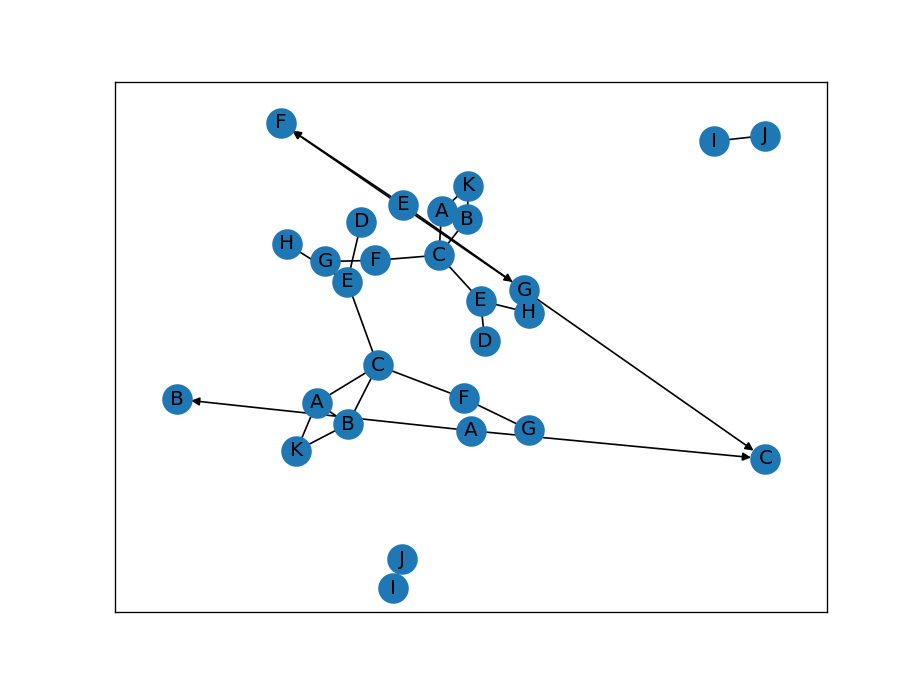

In [2]:
import networkx as nx
import numpy as np
import pandas as pd
%matplotlib notebook

G = nx.Graph()
G.add_edges_from([('A','K'), ('A','B'), ('A','C'), ('B','C'), ('B','K'), ('C','E'), ('C','F'), ('D','E'), ('F','F'), ('F','G'), ('E','H'), ('I','J')])
nx.draw_networkx(G)

In [4]:
nx.clustering(G, 'F') #local clustering

0


In [5]:
nx.clustering(G, 'A')

0.6666666666666666

In [6]:
nx.clustering(G, 'J')

0

#### II. Global Clustering Coefficient
measuring clustering on the whole network

In [11]:
nx.average_clustering(G) # Approach 1: Average Local Clustering Coefficient

0.22727272727272724

In [10]:
nx.transitivity(G) # Approach 2: Transitivity = 3*number of closed triads/number of open triads

0.35294117647058826

### Distance Measure

In [18]:
G.add_edge('E', 'I')

In [19]:
nx.shortest_path(G, 'A', 'H')

['A', 'C', 'E', 'H']

In [20]:
nx.shortest_path_length(G, 'A', 'H')

3

In [21]:
nx.shortest_path_length(G, 'A')

{'A': 0,
 'K': 1,
 'C': 1,
 'B': 1,
 'E': 2,
 'F': 2,
 'D': 3,
 'G': 3,
 'I': 3,
 'H': 3,
 'J': 4}

In [22]:
nx.average_shortest_path_length(G)

2.5636363636363635

#### BFS

In [14]:
bfs_tree = nx.bfs_tree 

OutEdgeView([('A', 'K'), ('A', 'B'), ('A', 'C'), ('C', 'E'), ('C', 'F'), ('E', 'D'), ('E', 'H'), ('F', 'G')])

#### Eccentricity of a node n is the largest distance between n and all other nodes.

In [23]:
nx.eccentricity(G)

{'A': 4,
 'K': 5,
 'B': 4,
 'C': 3,
 'E': 3,
 'F': 4,
 'D': 4,
 'G': 5,
 'H': 4,
 'I': 4,
 'J': 5}

#### Radius: of a graph is the min eccentricity 
#### Diameter: is the max eccentricity

In [24]:
nx.radius(G)

3

In [25]:
nx.diameter(G)

5

#### Periphery: of a graph is the set of nodes that have eccentricity equal to the diameter
#### Center: of a graph is the set of nodes that have eccentricity equal to the radius

In [26]:
nx.periphery(G)

['K', 'G', 'J']

In [27]:
nx.center(G)

['C', 'E']

## Connected Components

In [32]:
G.remove_edge('E', 'I')

In [33]:
nx.is_connected(G)

False

In [34]:
nx.number_connected_components(G)

2

In [35]:
sorted(nx.connected_components(G))

[{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'K'}, {'I', 'J'}]

In [36]:
nx.node_connected_component(G, 'I')

{'I', 'J'}

In [46]:
DG = nx.DiGraph()
DG.add_edges_from([('A','B'), ('A','C'), ('E', 'F'), ('E','G'), ('G','F'), ('G', 'C')])
nx.draw_networkx(DG)

In [47]:
nx.is_strongly_connected(DG)

False

In [48]:
nx.is_weakly_connected(DG)

True

### Network Robustness 

In [51]:
G.add_edge('E', 'I')
nx.edge_connectivity(G)

1

In [59]:
nx.minimum_edge_cut(G)

{('E', 'H')}

In [52]:
nx.node_connectivity(G)

1

In [60]:
nx.minimum_node_cut(G)

{'E'}

In [55]:
sorted(nx.all_simple_paths(G, 'A', 'E'))

[['A', 'B', 'C', 'E'], ['A', 'C', 'E'], ['A', 'K', 'B', 'C', 'E']]

In [56]:
nx.node_connectivity(G, 'A', 'E')

1

In [57]:
nx.minimum_edge_cut(G, 'A', 'E')

{('C', 'E')}

In [58]:
nx.edge_connectivity(G, 'A', 'E')

1

## WEEK3

### Network Centrality

In [1]:
import networkx as nx
import numpy as np
import pandas as pd
%matplotlib notebook

<IPython.core.display.Javascript object>


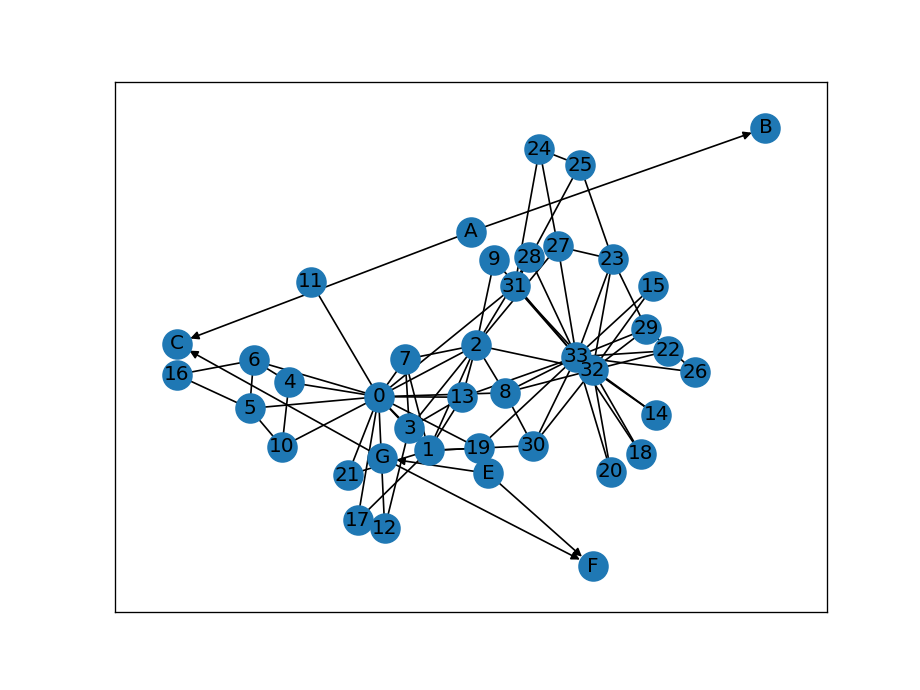

In [3]:
G = nx.karate_club_graph()
nx.convert_node_labels_to_integers(G, first_label=1)
nx.draw_networkx(G)

In [7]:
DG = nx.DiGraph()
DG.add_edges_from([('A','B'), ('A','C'), ('E', 'F'), ('E','G'), ('G','F'), ('G', 'C')])
nx.draw_networkx(DG)

#### 1. Degree Centrality = d(v) / N -1

In [4]:
degCent = nx.degree_centrality(G)

In [5]:
degCent[8]

0.15151515151515152

For directed Networks: degCen = d(v)(in) or d(v)(out)/N-1

In [8]:
indegCent = nx.in_degree_centrality(DG)

In [10]:
indegCent['B']

0.2

In [11]:
outdegCent = nx.out_degree_centrality(DG)

In [12]:
outdegCent['A']

0.4

#### 2. Closeness Centrality

In [14]:
closeness = nx.closeness_centrality(DG)

In [15]:
closeness['B']

0.2

#### 3. Betweeness Centrality

# week4

## Degree Distributions

In [1]:
import networkx as nx
import numpy as np
import pandas as pd
%matplotlib notebook

import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


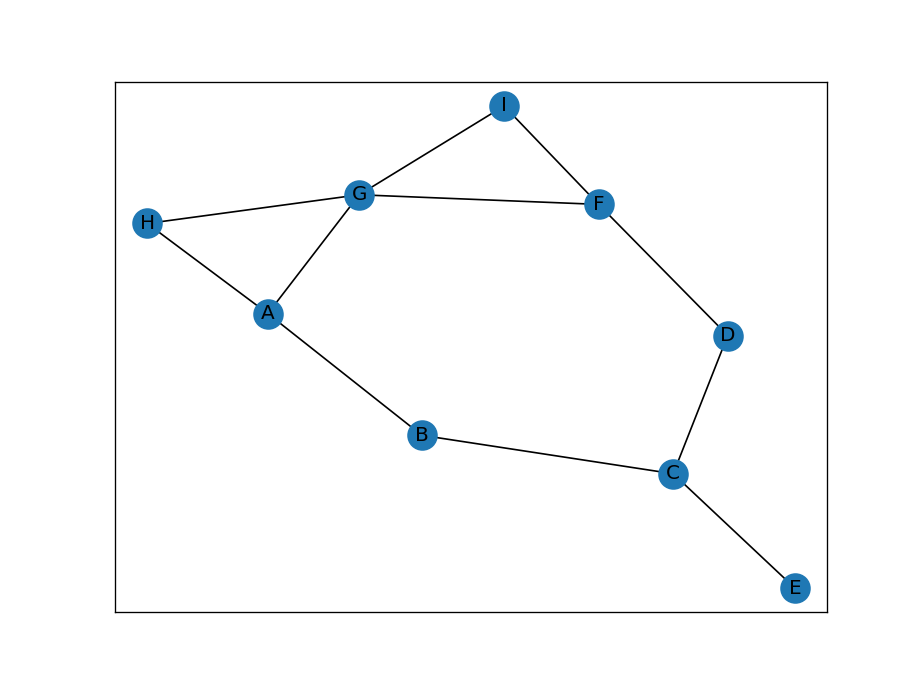

In [2]:
edges = [('A','B'), ('A', 'H'), ('A', 'G'), ('G', 'H'), ('B', 'C'), ('C', 'D'), ('C', 'E'), ('D', 'F'), ('G', 'F'), ('G', 'I'), ('F', 'I')]
G = nx.Graph()
G.add_edges_from(edges)
nx.draw_networkx(G)

In [17]:
degrees = G.degree()
degrees = dict(degrees)
degrees

{'A': 3, 'B': 2, 'H': 2, 'G': 4, 'C': 3, 'D': 2, 'E': 1, 'F': 3, 'I': 2}

In [18]:
degree_values = sorted(set(degrees.values()))
degree_values

[1, 2, 3, 4]

In [19]:
hist = [list(degrees.values()).count(i)/float(nx.number_of_nodes(G)) for i in degree_values]
hist

[0.1111111111111111,
 0.4444444444444444,
 0.3333333333333333,
 0.1111111111111111]

<IPython.core.display.Javascript object>


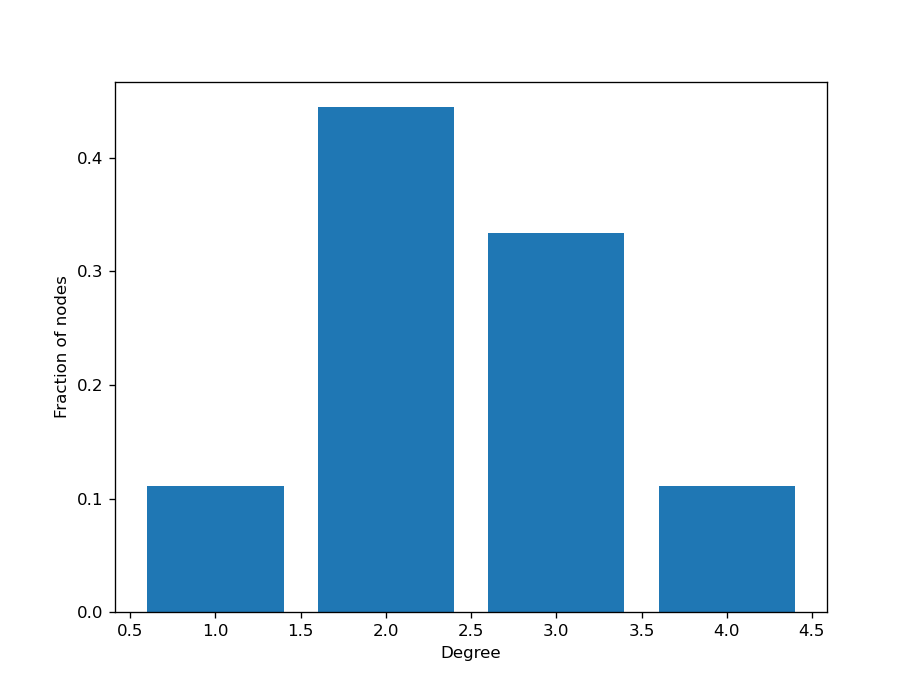

In [25]:
plt.bar(degree_values, hist)
plt.xlabel('Degree')
plt.ylabel('Fraction of nodes')
plt.show()

### For directed graph

<IPython.core.display.Javascript object>


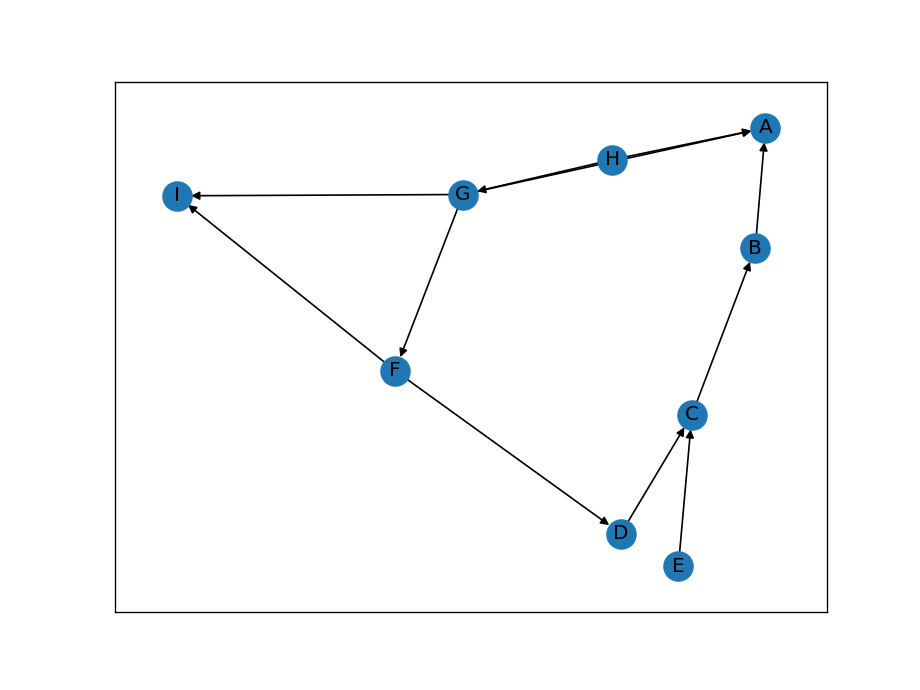

In [31]:
%matplotlib notebook

edges = [('B', 'A'), ('H','A'), ('G', 'A'), ('H', 'G'), ('C', 'B'), ('D', 'C'), ('E', 'C'), ('F', 'D'), ('G', 'F'), ('G', 'I'), ('F', 'I')]
G = nx.DiGraph()
G.add_edges_from(edges)
nx.draw_networkx(G, arrows=True)

In [28]:
in_degrees = dict(G.in_degree())
in_degree_values = sorted(set(in_degrees.values()))
in_degree_values

[0, 1, 2, 3]

In [29]:
hist = [list(in_degrees.values()).count(i)/float(nx.number_of_nodes(G)) for i in in_degree_values]
hist

[0.2222222222222222,
 0.4444444444444444,
 0.2222222222222222,
 0.1111111111111111]

<IPython.core.display.Javascript object>


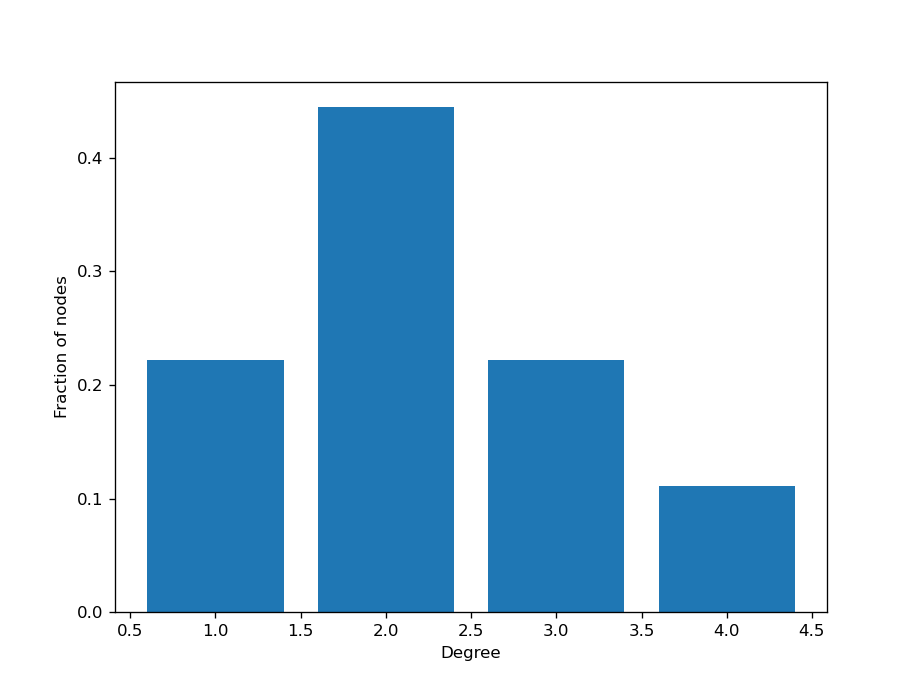

In [32]:
%matplotlib notebook

plt.bar(degree_values, hist)
plt.xlabel('Degree')
plt.ylabel('Fraction of nodes')
plt.show()

### Prefential Attachment model
#### barabasi_albert_graph(n.m) returns a network with n nodes. Each new node attaches to 'm' existing nodes according to ''preferential attachment model''

<IPython.core.display.Javascript object>


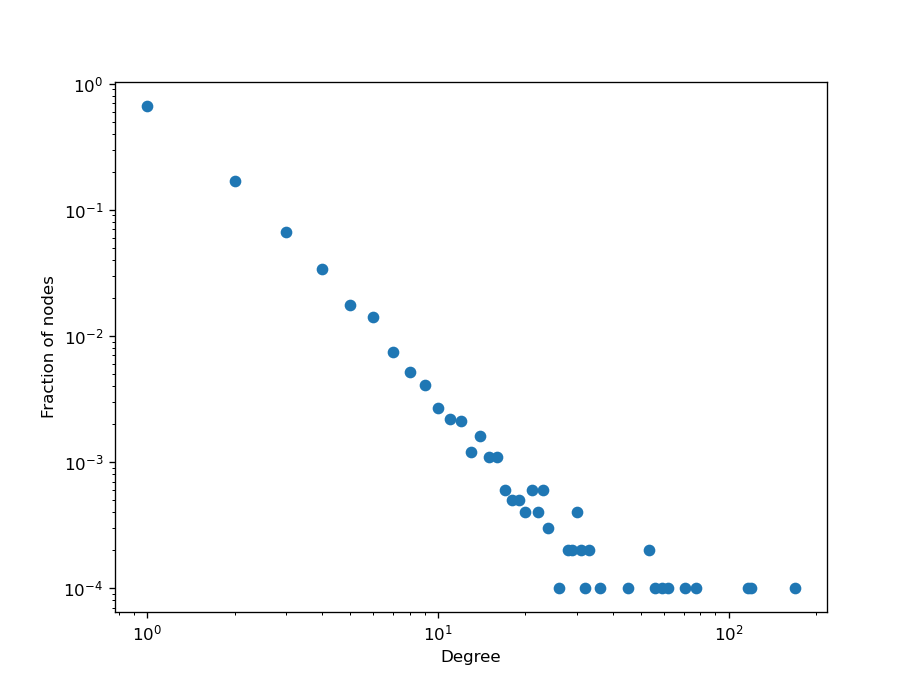

In [37]:
G = nx.barabasi_albert_graph(10000, 1)
degrees = dict(G.degree())
degree_values = sorted(set(degrees.values()))
hist = [list(degrees.values()).count(i)/float(nx.number_of_nodes(G)) for i in degree_values]

%matplotlib notebook

plt.plot(degree_values, hist, 'o')
plt.xlabel('Degree')
plt.ylabel('Fraction of nodes')
plt.xscale('log')
plt.yscale('log')
plt.show()


## Small World Networks

<IPython.core.display.Javascript object>


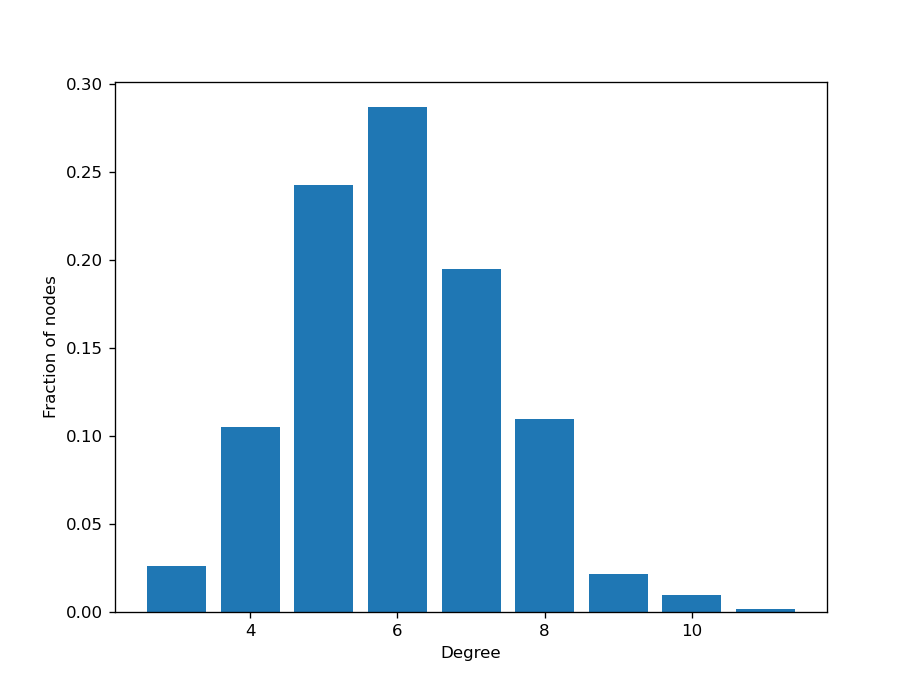

In [39]:
G = nx.watts_strogatz_graph(1000, 6, 0.4)
degrees = dict(G.degree())
degree_values = sorted(set(degrees.values()))
hist = [list(degrees.values()).count(i)/float(nx.number_of_nodes(G)) for i in degree_values]

%matplotlib notebook

plt.bar(degree_values, hist)
plt.xlabel('Degree')
plt.ylabel('Fraction of nodes')
plt.show()

In [40]:
#other variants: connnected_watts_strogatz_graph, newman_watts_strogatz_graph

## Link Prediction

### I. Common Neighbors

<IPython.core.display.Javascript object>


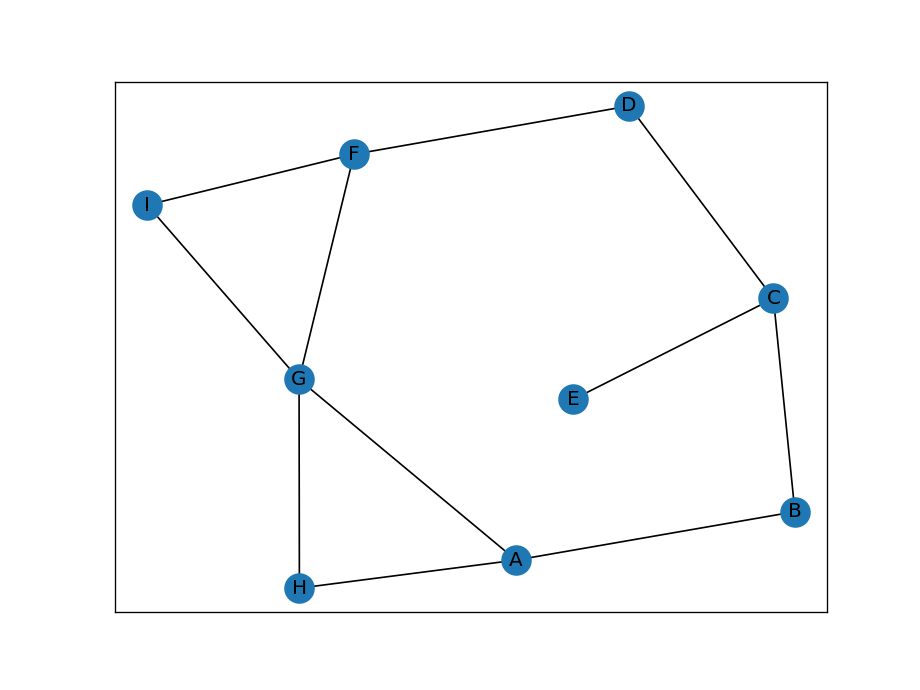

In [2]:
edges = [('A','B'), ('A', 'H'), ('A', 'G'), ('G', 'H'), ('B', 'C'), ('C', 'D'), ('C', 'E'), ('D', 'F'), ('G', 'F'), ('G', 'I'), ('F', 'I')]
G = nx.Graph()
G.add_edges_from(edges)
nx.draw_networkx(G)

In [12]:
non_edges = [e for e in nx.non_edges(G)]

In [15]:
common_neigh = [e[0], e[1], len(list(nx.common_neighbors(G, e[0], e[1]))) for e in non_edges]
common_neigh

SyntaxError: invalid syntax (<ipython-input-15-784ed7671515>, line 1)

In [19]:
import operator

common_neigh = []
for e in non_edges:
    common_neigh.append([e[0], e[1], len(list(nx.common_neighbors(G, e[0], e[1])))])
sorted(common_neigh, key = operator.itemgetter(2), reverse=True)

[['A', 'C', 1],
 ['A', 'F', 1],
 ['A', 'I', 1],
 ['D', 'E', 1],
 ['D', 'G', 1],
 ['D', 'I', 1],
 ['D', 'B', 1],
 ['C', 'F', 1],
 ['E', 'B', 1],
 ['F', 'H', 1],
 ['G', 'B', 1],
 ['I', 'H', 1],
 ['H', 'B', 1],
 ['A', 'D', 0],
 ['A', 'E', 0],
 ['D', 'H', 0],
 ['C', 'G', 0],
 ['C', 'H', 0],
 ['C', 'I', 0],
 ['E', 'F', 0],
 ['E', 'G', 0],
 ['E', 'I', 0],
 ['E', 'H', 0],
 ['F', 'B', 0],
 ['I', 'B', 0]]

### 2. Jaccard Coefficient

In [21]:
l = nx.jaccard_coefficient(G)
sorted(l, key = operator.itemgetter(2), reverse=True)

[('D', 'E', 0.5),
 ('E', 'B', 0.5),
 ('D', 'I', 0.3333333333333333),
 ('D', 'B', 0.3333333333333333),
 ('I', 'H', 0.3333333333333333),
 ('H', 'B', 0.3333333333333333),
 ('A', 'I', 0.25),
 ('F', 'H', 0.25),
 ('A', 'C', 0.2),
 ('A', 'F', 0.2),
 ('D', 'G', 0.2),
 ('C', 'F', 0.2),
 ('G', 'B', 0.2),
 ('A', 'D', 0.0),
 ('A', 'E', 0.0),
 ('D', 'H', 0.0),
 ('C', 'G', 0.0),
 ('C', 'H', 0.0),
 ('C', 'I', 0.0),
 ('E', 'F', 0.0),
 ('E', 'G', 0.0),
 ('E', 'I', 0.0),
 ('E', 'H', 0.0),
 ('F', 'B', 0.0),
 ('I', 'B', 0.0)]

### 3. Resource Allocator

In [22]:
l = nx.resource_allocation_index(G)
sorted(l, key = operator.itemgetter(2), reverse=True)

[('A', 'C', 0.5),
 ('C', 'F', 0.5),
 ('D', 'E', 0.3333333333333333),
 ('D', 'G', 0.3333333333333333),
 ('D', 'I', 0.3333333333333333),
 ('D', 'B', 0.3333333333333333),
 ('E', 'B', 0.3333333333333333),
 ('G', 'B', 0.3333333333333333),
 ('H', 'B', 0.3333333333333333),
 ('A', 'F', 0.25),
 ('A', 'I', 0.25),
 ('F', 'H', 0.25),
 ('I', 'H', 0.25),
 ('A', 'D', 0),
 ('A', 'E', 0),
 ('D', 'H', 0),
 ('C', 'G', 0),
 ('C', 'H', 0),
 ('C', 'I', 0),
 ('E', 'F', 0),
 ('E', 'G', 0),
 ('E', 'I', 0),
 ('E', 'H', 0),
 ('F', 'B', 0),
 ('I', 'B', 0)]

### 4. Adamic - Adar Index

In [23]:
l = nx.adamic_adar_index(G)
sorted(l, key = operator.itemgetter(2), reverse=True)

[('A', 'C', 1.4426950408889634),
 ('C', 'F', 1.4426950408889634),
 ('D', 'E', 0.9102392266268373),
 ('D', 'G', 0.9102392266268373),
 ('D', 'I', 0.9102392266268373),
 ('D', 'B', 0.9102392266268373),
 ('E', 'B', 0.9102392266268373),
 ('G', 'B', 0.9102392266268373),
 ('H', 'B', 0.9102392266268373),
 ('A', 'F', 0.7213475204444817),
 ('A', 'I', 0.7213475204444817),
 ('F', 'H', 0.7213475204444817),
 ('I', 'H', 0.7213475204444817),
 ('A', 'D', 0),
 ('A', 'E', 0),
 ('D', 'H', 0),
 ('C', 'G', 0),
 ('C', 'H', 0),
 ('C', 'I', 0),
 ('E', 'F', 0),
 ('E', 'G', 0),
 ('E', 'I', 0),
 ('E', 'H', 0),
 ('F', 'B', 0),
 ('I', 'B', 0)]

### 5. Preferential Attachment

In [25]:
l = nx.preferential_attachment(G)
sorted(l, key = operator.itemgetter(2), reverse=True)

[('C', 'G', 12),
 ('A', 'C', 9),
 ('A', 'F', 9),
 ('C', 'F', 9),
 ('D', 'G', 8),
 ('G', 'B', 8),
 ('A', 'D', 6),
 ('A', 'I', 6),
 ('C', 'H', 6),
 ('C', 'I', 6),
 ('F', 'H', 6),
 ('F', 'B', 6),
 ('D', 'I', 4),
 ('D', 'H', 4),
 ('D', 'B', 4),
 ('E', 'G', 4),
 ('I', 'H', 4),
 ('I', 'B', 4),
 ('H', 'B', 4),
 ('A', 'E', 3),
 ('E', 'F', 3),
 ('D', 'E', 2),
 ('E', 'I', 2),
 ('E', 'H', 2),
 ('E', 'B', 2)]

### 6. Community Common neighbors

In [37]:
G_comm = G.copy()
G_comm.nodes['A']['community'] = 0
G_comm.nodes['F']['community'] = 0
G_comm.nodes['G']['community'] = 0
G_comm.nodes['H']['community'] = 0
G_comm.nodes['I']['community'] = 0
G_comm.nodes['B']['community'] = 1
G_comm.nodes['C']['community'] = 1
G_comm.nodes['D']['community'] = 1
G_comm.nodes['E']['community'] = 1

In [40]:
l = nx.cn_soundarajan_hopcroft(G_comm)
sorted(l, key = operator.itemgetter(2), reverse=True)

[('A', 'F', 2),
 ('A', 'I', 2),
 ('D', 'E', 2),
 ('D', 'B', 2),
 ('E', 'B', 2),
 ('F', 'H', 2),
 ('I', 'H', 2),
 ('A', 'C', 1),
 ('D', 'G', 1),
 ('D', 'I', 1),
 ('C', 'F', 1),
 ('G', 'B', 1),
 ('H', 'B', 1),
 ('A', 'D', 0),
 ('A', 'E', 0),
 ('D', 'H', 0),
 ('C', 'G', 0),
 ('C', 'H', 0),
 ('C', 'I', 0),
 ('E', 'F', 0),
 ('E', 'G', 0),
 ('E', 'I', 0),
 ('E', 'H', 0),
 ('F', 'B', 0),
 ('I', 'B', 0)]

### 7. Community Resource Allocation

In [41]:
l = nx.ra_index_soundarajan_hopcroft(G_comm)
sorted(l, key = operator.itemgetter(2), reverse=True)

[('D', 'E', 0.3333333333333333),
 ('D', 'B', 0.3333333333333333),
 ('E', 'B', 0.3333333333333333),
 ('A', 'F', 0.25),
 ('A', 'I', 0.25),
 ('F', 'H', 0.25),
 ('I', 'H', 0.25),
 ('A', 'D', 0),
 ('A', 'C', 0),
 ('A', 'E', 0),
 ('D', 'G', 0),
 ('D', 'I', 0),
 ('D', 'H', 0),
 ('C', 'G', 0),
 ('C', 'H', 0),
 ('C', 'F', 0),
 ('C', 'I', 0),
 ('E', 'F', 0),
 ('E', 'G', 0),
 ('E', 'I', 0),
 ('E', 'H', 0),
 ('F', 'B', 0),
 ('G', 'B', 0),
 ('I', 'B', 0),
 ('H', 'B', 0)]